In [1]:
import IPython.display as ipd
import os
import numpy as np
import pandas as pd

In [2]:
directory='E:/bdann audio/'

In [3]:
from glob import glob
glob(directory)

['E:/bdann audio/']

In [4]:
#Actor_01
folder_name='Actor_0'
all_=[]
for i in range(1,25):
    for root, dirs, files in os.walk(directory+folder_name+str(i)+'/'):
        all_.append(files)

In [5]:
#Actor_01
folder_name='Actor_1'
for i in range(0,10):
    for root, dirs, files in os.walk(directory+folder_name+str(i)+'/'):
        all_.append(files)

In [6]:
#Actor_01
folder_name='Actor_2'
for i in range(0,5):
    for root, dirs, files in os.walk(directory+folder_name+str(i)+'/'):
        all_.append(files)

In [7]:
file_names=np.array(all_)

In [8]:
file_names=file_names.reshape(-1,1)

In [9]:
df=pd.DataFrame(file_names,columns=['File_name'])

In [10]:
df.head() #Modality*-speech/song*-emotion-emotional intensity-statement-repetition*-actor

,File_name
0,03-01-01-01-01-01-01.wav
1,03-01-01-01-01-02-01.wav
2,03-01-01-01-02-01-01.wav
3,03-01-01-01-02-02-01.wav
4,03-01-02-01-01-01-01.wav


In [11]:
df['emotion']=""

In [12]:
df['emotional intensity']=""

In [13]:
df["statement"]=""

In [14]:
df["actor"]=""

In [15]:
df['sex']=""

In [16]:
df.head()

,File_name,emotion,emotional intensity,statement,actor,sex
0,03-01-01-01-01-01-01.wav,,,,,
1,03-01-01-01-01-02-01.wav,,,,,
2,03-01-01-01-02-01-01.wav,,,,,
3,03-01-01-01-02-02-01.wav,,,,,
4,03-01-02-01-01-01-01.wav,,,,,


In [17]:
for i in range(len(df)):
    df.loc[i,'emotion']=df.loc[i,"File_name"][6:8]
    df.loc[i,'emotional intensity']=df.loc[i,"File_name"][9:11]
    df.loc[i,'statement']=df.loc[i,"File_name"][12:14]
    df.loc[i,'actor']=df.loc[i,"File_name"][-6:-4]
    if(int(df.loc[i,'actor'])%2==0):
        df.loc[i,'sex']="Female"
    else:
        df.loc[i,'sex']="Male"

In [18]:
df.tail()

,File_name,emotion,emotional intensity,statement,actor,sex
1435,03-01-08-01-02-02-24.wav,08,01,02,24,Female
1436,03-01-08-02-01-01-24.wav,08,02,01,24,Female
1437,03-01-08-02-01-02-24.wav,08,02,01,24,Female
1438,03-01-08-02-02-01-24.wav,08,02,02,24,Female
1439,03-01-08-02-02-02-24.wav,08,02,02,24,Female




Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).


Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.


Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").


Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [19]:
df['statement'].value_counts()

01    720
02    720
Name: statement, dtype: int64

In [21]:
import librosa

In [22]:
import os
import pandas as pd
import librosa
import glob 
import librosa.display
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))


<Figure size 1200x400 with 0 Axes>

In [23]:
df.describe()

,File_name,emotion,emotional intensity,statement,actor,sex
count,1440,1440,1440,1440,1440,1440
unique,1440,8,2,2,24,2
top,03-01-02-02-02-02-11.wav,03,01,01,18,Female
freq,1,192,768,720,60,720


In [24]:
all_list=[]
all_dict={}
folder_name='Actor_0'
all_=[]
for i in range(1,10):
    for root, dirs, files in os.walk(directory+folder_name+str(i)+'/'):
        for name in files:
            all_list.append(directory+folder_name+str(i)+'/'+name)

In [25]:
#Actor_01
folder_name='Actor_1'
for i in range(0,10):
    for root, dirs, files in os.walk(directory+folder_name+str(i)+'/'):
         for name in files:
           # print(directory+folder_name+str(i)+'/'+name)
            all_list.append(directory+folder_name+str(i)+'/'+name)

In [26]:
#Actor_01
folder_name='Actor_2'
for i in range(0,5):
    for root, dirs, files in os.walk(directory+folder_name+str(i)+'/'):
        for name in files:
           # print(directory+folder_name+str(i)+'/'+name)
            all_list.append(directory+folder_name+str(i)+'/'+name)

In [27]:
df_features=pd.DataFrame()
df_temp=pd.DataFrame()

In [28]:
#ctr=0
for path in all_list:
    y, sr = librosa.load(path)
    sr=np.array(sr)  
    mfccs=np.mean(librosa.feature.mfcc(y=y,n_mfcc=25),axis=0)
    df_temp=pd.DataFrame([-mfccs/100])
    df_temp=df_temp.iloc[:,0:130]
    df_features=df_features.append(df_temp,sort=False)
    #ctr=ctr+1
    
    

In [29]:
df_features=df_features.reset_index()

In [30]:
df_features.head()

,index,0,1,2,3,4,5,6,7,8,...,120,121,122,123,124,125,126,127,128,129
0,0,0.342924,0.342924,0.342924,0.342924,0.342924,0.342924,0.342924,0.341104,0.342924,...,0.315025,0.311651,0.299345,0.283028,0.280041,0.296350,0.330706,0.330182,0.322924,0.313715
1,0,0.345956,0.345956,0.345956,0.345956,0.322586,0.313517,0.334316,0.322830,0.315307,...,0.325400,0.310845,0.307969,0.333794,0.345956,0.345956,0.345956,0.345956,0.345956,0.345956
2,0,0.296179,0.287216,0.271472,0.285210,0.297537,0.292036,0.296292,0.286695,0.299698,...,0.341822,0.342449,0.342449,0.342449,0.342449,0.342449,0.342449,0.341810,0.342449,0.342449
3,0,0.306829,0.312059,0.310042,0.303921,0.312275,0.301362,0.311407,0.307854,0.299451,...,0.333352,0.334430,0.337250,0.314215,0.297450,0.286796,0.298316,0.318635,0.321187,0.304724
4,0,0.330859,0.311734,0.303332,0.322367,0.327429,0.328976,0.348300,0.344684,0.352727,...,0.289305,0.277744,0.283784,0.298071,0.293734,0.298486,0.293523,0.296387,0.312363,0.308062


In [31]:
df_features.drop('index',axis=1,inplace=True)


In [32]:
df_features_cols=list('mf'+str(x) for x in range(0,130))

In [33]:
df_features.columns=df_features_cols

In [34]:
df_features.head()

,mf0,mf1,mf2,mf3,mf4,mf5,mf6,mf7,mf8,mf9,...,mf120,mf121,mf122,mf123,mf124,mf125,mf126,mf127,mf128,mf129
0,0.342924,0.342924,0.342924,0.342924,0.342924,0.342924,0.342924,0.341104,0.342924,0.342924,...,0.315025,0.311651,0.299345,0.283028,0.280041,0.296350,0.330706,0.330182,0.322924,0.313715
1,0.345956,0.345956,0.345956,0.345956,0.322586,0.313517,0.334316,0.322830,0.315307,0.322695,...,0.325400,0.310845,0.307969,0.333794,0.345956,0.345956,0.345956,0.345956,0.345956,0.345956
2,0.296179,0.287216,0.271472,0.285210,0.297537,0.292036,0.296292,0.286695,0.299698,0.312414,...,0.341822,0.342449,0.342449,0.342449,0.342449,0.342449,0.342449,0.341810,0.342449,0.342449
3,0.306829,0.312059,0.310042,0.303921,0.312275,0.301362,0.311407,0.307854,0.299451,0.313133,...,0.333352,0.334430,0.337250,0.314215,0.297450,0.286796,0.298316,0.318635,0.321187,0.304724
4,0.330859,0.311734,0.303332,0.322367,0.327429,0.328976,0.348300,0.344684,0.352727,0.345652,...,0.289305,0.277744,0.283784,0.298071,0.293734,0.298486,0.293523,0.296387,0.312363,0.308062


In [35]:
df_features['MFCC_Mean']=df_features[df_features_cols].mean(axis=1)
df_features['MFCC_Var']=df_features[df_features_cols].var(axis=1)
df_features['Max']=df_features[df_features_cols].max(axis=1)
df_features['Min']=df_features[df_features_cols].min(axis=1)
df_features['Range']=df_features['Max']-df_features['Min']


In [36]:
df_features.dropna().shape

(1438, 135)

In [37]:
df_features_med=pd.DataFrame()

for path in all_list:
    
    y, sr = librosa.load(path)
     
    S = np.abs(librosa.stft(y))
    
    med_pow=librosa.power_to_db(S**2, ref=np.median)
    med_pow=np.mean(med_pow,axis=0)
    df_temp=pd.DataFrame([med_pow])
    df_temp=df_temp.iloc[:,0:130]
    df_features_med=df_features_med.append(df_temp,sort=False)
  

In [38]:
df_features_med=df_features_med.reset_index()

In [39]:
df_features_med.drop('index',axis=1,inplace=True)

In [40]:
df_features_med_cols=list('med'+str(x) for x in range(0,130))

In [41]:
df_features_med.columns=df_features_med_cols

In [42]:
df_features_med['Med_Mean']=df_features_med[df_features_med_cols].mean(axis=1)
df_features_med['Med_Var']=df_features_med[df_features_med_cols].var(axis=1)
df_features_med['Med_Max']=df_features_med[df_features_med_cols].max(axis=1)
df_features_med['Med_Min']=df_features_med[df_features_med_cols].min(axis=1)
df_features_med['Med_Range']=df_features_med['Med_Max']-df_features_med['Med_Min']


In [43]:
df_features_med.head()

,med0,med1,med2,med3,med4,med5,med6,med7,med8,med9,...,med125,med126,med127,med128,med129,Med_Mean,Med_Var,Med_Max,Med_Min,Med_Range
0,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,...,9.352746,9.278075,9.277531,9.290820,9.327163,18.491603,111.595933,42.156952,9.262009,32.894943
1,6.936813,6.936813,6.936813,6.936813,6.977341,7.005593,6.948557,6.977334,7.002578,6.973768,...,6.936813,6.936813,6.936813,6.936813,6.936813,16.957150,121.132584,41.334274,6.936813,34.397461
2,10.765522,10.817601,10.877713,10.812347,10.807872,10.838449,10.773182,10.797029,10.760042,10.734682,...,10.683197,10.683197,10.683197,10.683197,10.683197,19.663998,121.994462,45.913376,10.683197,35.230179
3,8.586119,8.468080,8.522299,8.673238,8.619113,8.618657,8.419887,8.449693,8.524390,8.412300,...,8.435557,8.391955,8.330348,8.326982,8.413927,17.325422,132.856090,44.052074,8.293892,35.758183
4,4.484564,4.598647,4.658389,4.536922,4.506588,4.496248,4.436078,4.440679,4.429935,4.448444,...,5.066894,4.901600,4.810863,4.731228,4.796741,15.432526,119.726209,39.131508,4.415634,34.715874


In [44]:
df_features_peak=pd.DataFrame()
for path in all_list:
    y, sr = librosa.load(path)
    sr=np.array(sr)  
    S = np.abs(librosa.stft(y))
    
    peak_pow=librosa.power_to_db(S**2, ref=np.max)
    peak_pow=np.mean(peak_pow,axis=0)
    df_temp=pd.DataFrame([peak_pow])
    df_temp=df_temp.iloc[:,0:130]
    df_features_peak=df_features_peak.append(df_temp,sort=False)
    #ctr=ctr+1
    

In [45]:
df_features_peak=df_features_peak.reset_index()

In [46]:
df_features_peak.drop('index',axis=1,inplace=True)


In [47]:
df_features_peak=df_features_peak*-1

In [48]:
df_features_peak_cols=list('peak'+str(x) for x in range(0,130))

In [49]:
df_features_peak.columns=df_features_peak_cols

In [50]:
df_features_peak['Med_Mean']=df_features_peak[df_features_peak_cols].mean(axis=1)
df_features_peak['Med_Var']=df_features_peak[df_features_peak_cols].var(axis=1)
df_features_peak['Med_Max']=df_features_peak[df_features_peak_cols].max(axis=1)
df_features_peak['Med_Min']=df_features_peak[df_features_peak_cols].min(axis=1)
df_features_peak['Med_Range']=df_features_peak['Med_Max']-df_features_peak['Med_Min']


In [51]:
df_features_all=pd.concat([df_features,df_features_med,df_features_peak],axis=1, sort=False)

In [52]:
df_features_peak.shape

(1440, 135)

In [53]:
df_features.to_csv('Mfccs_Features.csv')

In [54]:
import numpy as np
import os


class MFCC_HTK:

    win_len = 400
    win_shift = 160
    preemph = 0.97
    filter_num = 24
    lifter_num = 22
    mfcc_num = 12
    lo_freq = 80
    hi_freq = 7500
    samp_freq = 16000
    filter_mat = None
    raw_energy = False

    feat_melspec = False
    feat_mfcc = True
    feat_energy = True

    ceps_energy = True
    enormalise = False
    sil_floor = 50.0
    escale = 1.0
    cmn = False

    def load_filter(self, filename):
        """ Internal load filter method -- you don't need to run this yourself.
            Loads filter spec from file.
        """

        if not os.path.isfile(filename):
            raise IOError(filename)

        data = np.genfromtxt(filename, delimiter=',')

        self.filter_num = np.asscalar(np.max(data[:, 1]).astype('int'))
        self.filter_mat = np.zeros((self.fft_len / 2, self.filter_num))

        for i in range(len(data)):

            wt = data[i, 0]
            bin = np.asscalar(data[i, 1].astype('int'))

            if bin < 0:
                continue

            if bin > 0:
                self.filter_mat[i, bin - 1] = wt

            if bin < self.filter_num:
                self.filter_mat[i, bin] = 1 - wt

    def create_filter(self, num):
        """ Internal create filter method -- you don't need to runthis yourself.
            Creates filter specified by their count.
        """

        self.filter_num = num
        self.filter_mat = np.zeros((self.fft_len // 2, self.filter_num))

        mel2freq = lambda mel: 700.0 * (np.exp(mel / 1127.0) - 1)
        freq2mel = lambda freq: 1127 * (np.log(1 + (freq / 700.0)))

        lo_mel = freq2mel(self.lo_freq);
        hi_mel = freq2mel(self.hi_freq);

        mel_c = np.linspace(lo_mel, hi_mel, self.filter_num + 2)
        freq_c = mel2freq(mel_c);

        point_c = freq_c / float(self.samp_freq) * self.fft_len
        point_c = np.floor(point_c).astype('int')

        for f in range(self.filter_num):
            d1 = point_c[f + 1] - point_c[f]
            d2 = point_c[f + 2] - point_c[f + 1]

            self.filter_mat[point_c[f]:point_c[f + 1] + 1, f] = np.linspace(0, 1, d1 + 1)
            self.filter_mat[point_c[f + 1]:point_c[f + 2] + 1, f] = np.linspace(1, 0, d2 + 1)

    def __init__(self,
                 filter_file=None,
                 win_len=400,
                 win_shift=160,
                 preemph=0.97,
                 filter_num=26,
                 lifter_num=22,
                 mfcc_num=12,
                 lo_freq=80,
                 hi_freq=7500,
                 samp_freq=16000,
                 raw_energy=False,
                 feat_melspec=False,
                 feat_mfcc=True,
                 feat_energy=True,
                 ceps_energy=True,
                 enormalise=False,
                 sil_floor=50.0,
                 escale=1.0,
                 cmn=False):
        """ Class contructor -- you can set all the processing parameters here.
            Args:
                filter_file (string): load the filter specification from a file. This exists
                    to allow binary comaptibility with HTK, because they implement the filters
                    slightly differently than mentioned in their docs.
                    The format of filter file is CSV, where each line contains two values:
                    weight and id of the filter at the given spectrum point. The number of
                    lines is equal to the number of spectral points computed by FFT (e.g. 256
                    for 512-point FFT - half due to Nyquist).
                    The file contains only raising edges of the filters. The falling edges are
                    computed by taking the rasing edge of the next filter and inverting it (i.e
                    computing 1-x). Filter id -1 means there is no filter at that point.
                    If you set filter_file is None, a built-in method will be used to create
                    half-overlapping triangular filters spread evenly between lo_freq and
                    hi_freq in the mel domain.
                win_len (int): Length of frame in samples. Default value is 400, which is
                    equal to 25 ms for a signal sampled at 16 kHz (i.e. 2.5x the win_shift length)
                win_shift (int): Frame shift in samples - in other words, distance between
                    the start of two consecutive frames. Default value is 160, which is
                    equal to 10 ms for a signal sampled at 16 kHz. This is generates 100 frames
                    per second of the audio, which is a standard framerate for many audio tasks.
                preemph (float): Preemphasis coefficient. This is used to calculate first-order
                    difference of the signal.
                filter_num (int): Number of triangular filters used to reduce the spectrum. Default
                    value is 24. If filter_file is used (set to different than None), this value is
                    overwritten with the contents of the filter_file.
                mfcc_num (int): Number of MFCCs computed. Default value is 12.
                lo_freq (float): Lowest frequency (in Hz) used in computation. Default value is
                    80 Hz. This is used exclusively to compute filters. The value is ignored if
                    filters are loaded from file.
                hi_freq (float): Highest frequency (in Hz) used in computation. Default value is
                    7500 Hz. This is used exclusively to compute filters. The value is ignored if
                    filters are loaded from file.
                samp_freq (int): Sampling frequency of the audio. Default value is 16000, which is
                    a common value for recording speech. Due to Nyquist, the maximum frequency stored
                    is half of this value, i.e. 8000 Hz.
                raw_energy (boolean): Should the energy be computed from the raw signal, or (if false)
                    should the 0'th coepstral coefficient be used instead, which is almost equivalent
                    and much faster to compute (since we compute MFCC anyway).
                feat_melspec (boolean): Should the spectral features be added to output. These are
                    the values of the logarithm of the filter outputs. The number of these features
                    is eqeual to filter_num.
                feat_mfcc (boolean): Should MFCCs be added to the output. The number of these features
                    is equal to mfcc_num.
                feat_energy (boolean): Should energy be added to the output. This is a single value.
                ceps_energy (boolean): Energy is calculated from the 0th cepstral coefficient. Equivalent
                    to option _0 in HTK. If false, it's equivalent to _E. (default true)
                enormalise (boolean): subtract max value of energy and add 1.0. Only applied to normal
                    (non cepstral) energy. (default false)
                sil_floor (float, dB): The lowest energy in the utterance can be clamped using this configuration
                    parameter which gives the ratio between the maximum and minimum energies in the utterance in dB.
                    (default 50)
                escale (float): scale energy by this value. only applied to normal (non cepstral) energy.
                    (default false)
                cmn (boolean): perform Cepstral Mean Normalization - subtract utterance mean from cepstral
                    coefficients only. Equivalent to _Z in HTK options. (default false)
        """

    @staticmethod
    def get_delta(feat, deltawin=2):
        """ Computes delta using the HTK method.
            Args:
                feat (numpy.ndarray): Numpy matrix of shape WxF, where W is number of frames
                    and F is number of features.
                deltawin (int): The DELTAWINDOW parameter of the delta computation.
                    Check HTK Book Chapter 5.6 for details.
            Returns:
                numpy.ndarray: A matrix of the same size as argument feat containing the deltas
                    of the provided features.
        """

        deltas = []

        norm = 2.0 * (sum(np.arange(1, deltawin + 1) ** 2));
        win_num = feat.shape[0]
        win_len = feat.shape[1]

        for win in range(win_num):
            delta = np.zeros(win_len)
            for t in range(1, deltawin + 1):
                tm = win - t
                tp = win + t

                if tm < 0:
                    tm = 0
                if tp >= win_num:
                    tp = win_num - 1

                delta += (t * (feat[tp] - feat[tm])) / norm

            deltas.append(delta)

        return np.asarray(deltas)

In [55]:
#htk_obj= MFCC_HTK()

In [56]:
#htk_array=df_features.values

In [57]:
#df_features.isnull().values.any()

In [58]:
df=pd.concat([df,df_features_all],axis=1, sort=False)

In [59]:
#df=df.drop('index',axis=1)

In [60]:
df.head(25)

,File_name,emotion,emotional intensity,statement,actor,sex,mf0,mf1,mf2,mf3,...,peak125,peak126,peak127,peak128,peak129,Med_Mean,Med_Var,Med_Max,Med_Min,Med_Range
0,03-01-01-01-01-01-01.wav,01,01,01,01,Male,0.342924,0.342924,0.342924,0.342924,...,79.909264,79.983932,79.984482,79.971191,79.934845,70.770405,111.595938,80.0,47.105057,32.894943
1,03-01-01-01-01-02-01.wav,01,01,01,01,Male,0.345956,0.345956,0.345956,0.345956,...,80.000000,80.000000,80.000000,80.000000,80.000000,69.979664,121.132561,80.0,45.602539,34.397461
2,03-01-01-01-02-01-01.wav,01,01,02,01,Male,0.296179,0.287216,0.271472,0.285210,...,80.000000,80.000000,80.000000,80.000000,80.000000,71.019198,121.994501,80.0,44.769817,35.230183
3,03-01-01-01-02-02-01.wav,01,01,02,01,Male,0.306829,0.312059,0.310042,0.303921,...,79.858337,79.901939,79.963547,79.966904,79.879959,70.968469,132.856090,80.0,44.241814,35.758186
4,03-01-02-01-01-01-01.wav,02,01,01,01,Male,0.330859,0.311734,0.303332,0.322367,...,79.348732,79.514038,79.604774,79.684402,79.618896,68.983108,119.726209,80.0,45.284122,34.715878
5,03-01-02-01-01-02-01.wav,02,01,01,01,Male,0.349841,0.331425,0.322454,0.344422,...,79.244179,79.309097,79.671402,79.966583,79.961617,70.198778,93.565940,80.0,49.048500,30.951500
6,03-01-02-01-02-01-01.wav,02,01,02,01,Male,0.356795,0.352509,0.350052,0.356795,...,79.564140,79.688560,79.681252,79.500771,79.654541,67.566050,151.720648,80.0,40.766075,39.233925
7,03-01-02-01-02-02-01.wav,02,01,02,01,Male,0.323259,0.323103,0.351185,0.355657,...,79.393372,79.369232,79.774300,79.912766,79.890335,68.535367,141.174106,80.0,42.375050,37.624950
8,03-01-02-02-01-01-01.wav,02,02,01,01,Male,0.321755,0.340982,0.369320,0.374672,...,75.142830,76.058266,76.658928,77.542435,78.279411,66.841664,124.460703,80.0,43.379814,36.620186
9,03-01-02-02-01-02-01.wav,02,02,01,01,Male,0.356791,0.357963,0.357963,0.357963,...,70.154816,69.814278,69.809479,70.793274,70.889145,67.853392,95.947511,80.0,47.021843,32.978157


In [61]:
df.to_csv('FeaturesAll.csv',index=False)

In [62]:
###DESCRIPTIVE ANALYSIS:
#this is the descriptive analysis for one emotion :make the same plots for all eight emotions for
#a single actor and analysize any patterns in the different emotions 

peak_pow ==  Compute dB relative to peak power


med_pow  == median power

In [63]:
y, sr = librosa.load(all_list[0])
S = np.abs(librosa.stft(y))
peak_pow=librosa.power_to_db(S**2, ref=np.max)
med_pow=librosa.power_to_db(S**2, ref=np.median)


peak_pow


array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

In [64]:
df_peak_pow_ampli=pd.DataFrame(peak_pow)
df_med_pow_ampli=pd.DataFrame(med_pow)

In [65]:
librosa.cqt_frequencies(24, fmin=librosa.note_to_hz('C2'))

array([ 65.40639133,  69.29565774,  73.41619198,  77.78174593,
        82.40688923,  87.30705786,  92.49860568,  97.998859  ,
       103.82617439, 110.        , 116.54094038, 123.47082531,
       130.81278265, 138.59131549, 146.83238396, 155.56349186,
       164.81377846, 174.61411572, 184.99721136, 195.99771799,
       207.65234879, 220.        , 233.08188076, 246.94165063])

In [66]:
df_peak_pow_ampli.head()

,0,1,2,3,4,5,6,7,8,9,...,133,134,135,136,137,138,139,140,141,142
0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,...,-80.00000,-80.000000,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0
1,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,...,-80.00000,-80.000000,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0
2,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,...,-80.00000,-80.000000,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0
3,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,...,-80.00000,-78.432083,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0
4,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,...,-74.39109,-74.684341,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0


In [67]:
df_med_pow_ampli.head()

,0,1,2,3,4,5,6,7,8,9,...,133,134,135,136,137,138,139,140,141,142
0,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,...,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009
1,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,...,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009
2,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,...,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009
3,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,...,9.262009,10.829926,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009
4,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,...,14.870918,14.577663,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009


In [68]:
 df_temp = pd.concat([df_peak_pow_ampli,df_med_pow_ampli], axis=1, sort=False)

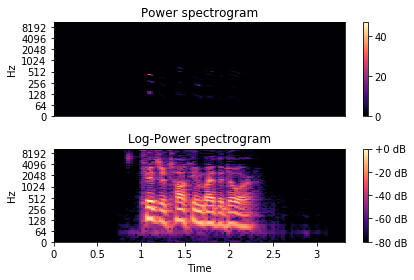

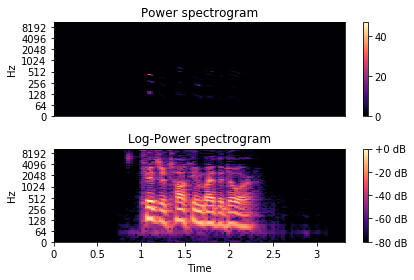

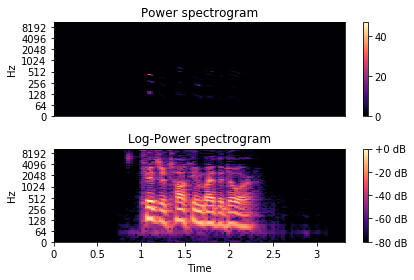

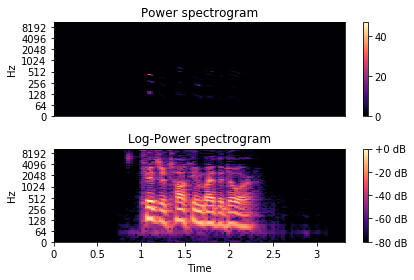

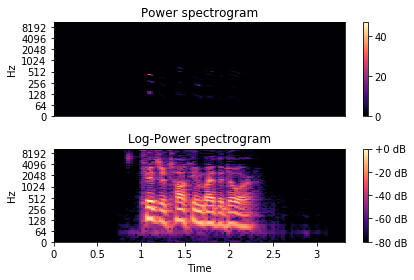

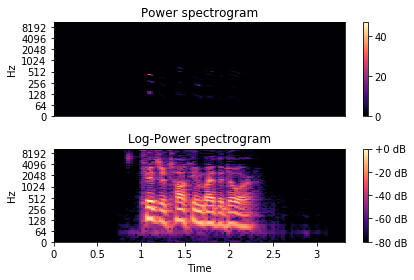

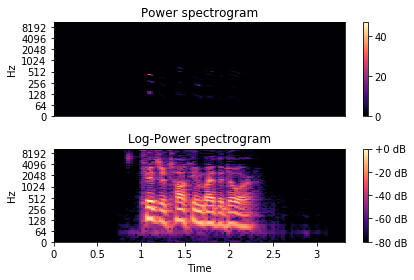

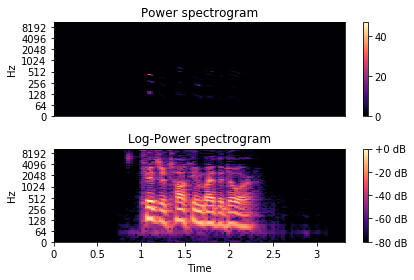

In [70]:
for ctrof in range(1,9):
    
    y, sr = librosa.load('E:/ACTOR1a/' +str(ctrof)+ '.wav')
    plt.figure()
    plt.subplot(2,1,1)
    librosa.display.specshow(S**2, sr=sr, y_axis='log')
    plt.colorbar()
    plt.title('Power spectrogram')
    plt.subplot(2, 1, 2)
    librosa.display.specshow(librosa.power_to_db(S**2, ref=np.max),sr=sr, y_axis='log', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Log-Power spectrogram')
    plt.tight_layout()

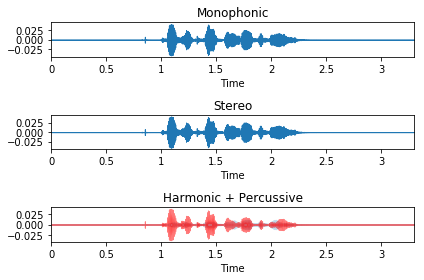

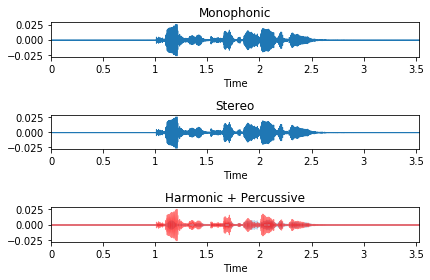

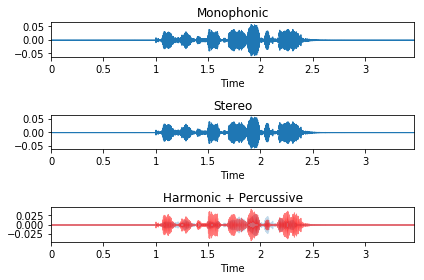

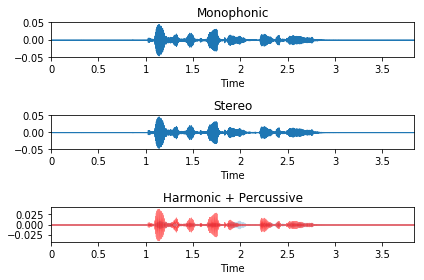

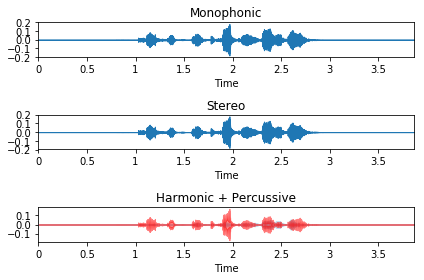

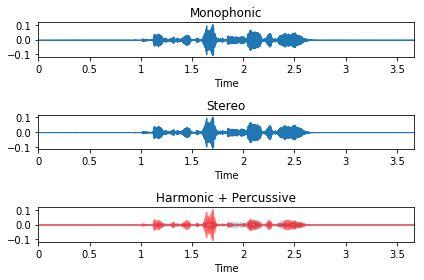

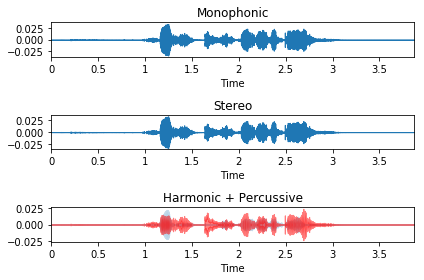

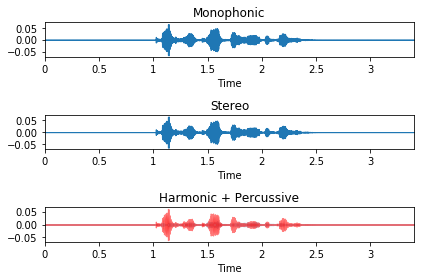

In [72]:
for ctrof in range(1,9):
    
    plt.figure()
    plt.subplot(3, 1, 1)

    y, sr = librosa.load('E:/ACTOR1a/' +str(ctrof)+ '.wav')

    librosa.display.waveplot(y, sr=sr)
    plt.title('Monophonic')
    y_harm, y_perc = librosa.effects.hpss(y)
    plt.subplot(3, 1, 3)
    librosa.display.waveplot(y_harm, sr=sr, alpha=0.25)
    librosa.display.waveplot(y_perc, sr=sr, color='r', alpha=0.5)
    plt.title('Harmonic + Percussive')


    plt.subplot(3, 1, 2)
    librosa.display.waveplot(y, sr=sr)
    plt.title('Stereo')
    plt.tight_layout()

In [73]:
# Beats and tempo ( Built a line chart for beats for each emotions (in one chart but diff line colors)
#and a line chart for tempo for all combined tempo)

In [74]:
y, sr = librosa.load(all_list[0])
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)

In [75]:
d=pd.DataFrame()

In [76]:
y, sr = librosa.load(all_list[0])
S = np.abs(librosa.stft(y))
peak_pow=(librosa.power_to_db(S**2, ref=np.max))
med_pow=librosa.power_to_db(S**2, ref=np.median)
peak_pow.shape


(1025, 143)

In [77]:
peak_pow=np.mean(peak_pow,axis=0)

In [78]:
peak_pow

array([-80.      , -80.      , -80.      , -80.      , -80.      ,
       -80.      , -80.      , -80.      , -80.      , -80.      ,
       -80.      , -80.      , -80.      , -80.      , -80.      ,
       -80.      , -80.      , -80.      , -80.      , -80.      ,
       -80.      , -80.      , -80.      , -80.      , -80.      ,
       -80.      , -80.      , -80.      , -80.      , -80.      ,
       -80.      , -79.99305 , -79.93133 , -79.91037 , -79.87465 ,
       -75.74319 , -66.51246 , -64.60508 , -70.86308 , -77.485855,
       -78.86609 , -78.5687  , -69.45587 , -54.80941 , -51.570152,
       -51.66286 , -51.976807, -52.24308 , -51.950428, -53.916363,
       -52.049744, -48.325363, -47.105057, -50.223686, -52.988976,
       -56.986572, -59.517067, -50.626038, -50.742065, -55.84448 ,
       -57.96231 , -57.564255, -58.11543 , -56.590633, -56.901497,
       -61.252193, -61.91755 , -60.358147, -57.2709  , -56.993664,
       -60.21739 , -64.86322 , -67.96669 , -69.10128 , -64.501

In [79]:
df_features_med=pd.DataFrame()
ctr=0
for path in all_list:
    
    y, sr = librosa.load(path)
     
    S = np.abs(librosa.stft(y))
    
    med_pow=librosa.power_to_db(S**2, ref=np.median)
    med_pow=np.mean(med_pow,axis=0)
    df_temp=pd.DataFrame([med_pow])
    df_temp=df_temp.iloc[:,0:130]
    df_features_med=df_features_med.append(df_temp,sort=False)
    ctr=ctr+1
    if ctr==2:
        break;

In [80]:
med_pow

array([ 6.936813 ,  6.936813 ,  6.936813 ,  6.936813 ,  6.977341 ,
        7.005593 ,  6.9485574,  6.977334 ,  7.0025783,  6.973768 ,
        6.98833  ,  7.0034986,  7.018471 ,  6.996076 ,  7.102851 ,
        7.071287 ,  6.972864 ,  6.9429216,  6.959411 ,  6.9698777,
        6.959158 ,  7.010184 ,  6.999412 ,  7.0165796,  7.006309 ,
        6.936813 ,  6.936813 ,  6.951462 ,  7.0307956,  7.0226507,
        6.957015 ,  6.9450297,  7.0025573,  7.029029 , 13.346452 ,
       15.773608 , 20.35708  , 22.10889  , 16.481304 ,  8.395923 ,
        7.1974506,  7.5553894,  9.392313 , 25.390896 , 32.44789  ,
       33.1951   , 33.10338  , 35.26888  , 36.184155 , 34.190983 ,
       29.645998 , 34.835728 , 39.615086 , 41.334274 , 38.541553 ,
       35.58747  , 34.430626 , 26.96165  , 31.989908 , 39.321526 ,
       38.30434  , 32.96512  , 30.318449 , 32.447506 , 34.63132  ,
       34.642487 , 30.5238   , 24.98271  , 27.928484 , 28.464521 ,
       29.966852 , 30.54245  , 28.000664 , 23.06715  , 20.9211

In [81]:
df_features_med
    

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,9.262009,...,9.346744,9.336122,9.366502,9.410257,9.410801,9.352746,9.278075,9.277531,9.290820,9.327163
0,6.936813,6.936813,6.936813,6.936813,6.977341,7.005593,6.948557,6.977334,7.002578,6.973768,...,6.982010,7.040626,7.050226,6.952427,6.936813,6.936813,6.936813,6.936813,6.936813,6.936813
